In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_81274/2314534787.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_df = pd.read_csv("ecommerce.csv", encoding='latin1')
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
def dataset_check(data_df):
    print("Value Counts of Quantity:", data_df['Quantity'].value_counts())
    print("Null Value Check:", data_df.isnull().values.any())
    print("Total number of null values:", data_df.isnull().sum().sum())

In [5]:
def preprocess_dataset(data_df):
    numerical_columns = ['Quantity', 'UnitPrice']
    data_df[numerical_columns] = data_df[numerical_columns].fillna(data_df[numerical_columns].mean())
    categorical_column = ['Country']
    data_df[categorical_column] = data_df[categorical_column].fillna(data_df[categorical_column].mode().iloc[0])
    return data_df

In [6]:
def normalize_data(data_df):
    numerical_columns = ['Quantity', 'UnitPrice']
    scaler = StandardScaler()
    data_df[numerical_columns] = scaler.fit_transform(data_df[numerical_columns])
    return data_df

# I chose to remove all the Null values both in the numerical mainly because I have not really 
# done this before and wanted to experiment with the results I received. 

In [7]:
X = data_df[['Quantity', 'UnitPrice']]

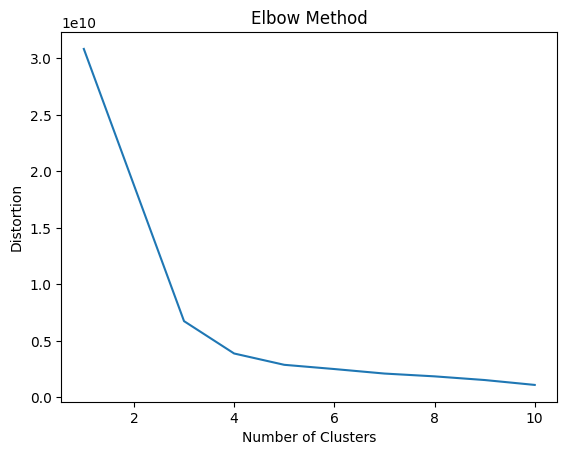

In [8]:
def plot_elbow(X, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters + 1):
        distortion = KMeans(n_clusters=k).fit(X).inertia_
        distortions.append(distortion)
    
    plt.plot(range(1, max_clusters + 1), distortions)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_elbow(X)

In [9]:
# I chose to look at Quantity and Unit Price because most of the other data seemed 
# to be not that beneficial for making decesion. Specifically, some of the other numerical 
# data such as Invoice Number and Stock Code did not seem like something I could work with.

In [10]:
linked = linkage(X,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked,labels= list(y))

: 

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(X['Quantity'],X['UnitPrice'], c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Quantity'][i],X['UnitPrice'][i]))

plt.ylabel('Quantity')
plt.xlabel('UnitPrice')
plt.show()

In [ ]:
# None of my code would run for this next step, therefore the first option was the better 
# of the two. 